In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
import itertools
import warnings
warnings.filterwarnings('ignore')
import io

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
# init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns

# 1. Análisis exploratorio
Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) (https://www.kaggle.com/karangadiya/fifa19) como 'data.csv' 

In [5]:
url='https://raw.githubusercontent.com/DiploDatos/AprendizajeNOSupervisado/master/2021/data.csv'
df = pd.read_csv(url, usecols=lambda x: x != 'Unnamed: 0')
df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
11223,242740,Tiago Marques,30,https://cdn.sofifa.org/players/4/19/242740.png,Brazil,https://cdn.sofifa.org/flags/54.png,64,64,Jeju United FC,https://cdn.sofifa.org/teams/2/light/1478.png,€425K,€2K,1428,Right,1.0,5.0,2.0,Medium/ Medium,Normal,No,ST,99.0,"Jan 1, 2018",NaN,2021,6'4,172lbs,63+2,63+2,63+2,57+2,60+2,60+2,60+2,57+2,55+2,55+2,55+2,55+2,47+2,47+2,47+2,55+2,39+2,36+2,36+2,36+2,39+2,37+2,36+2,36+2,36+2,37+2,28.0,67.0,60.0,41.0,52.0,62.0,31.0,31.0,33.0,60.0,65.0,73.0,63.0,52.0,44.0,61.0,68.0,67.0,75.0,60.0,34.0,13.0,76.0,43.0,61.0,57.0,25.0,16.0,19.0,5.0,12.0,7.0,15.0,9.0,€531K
14421,203430,G. Ray,24,https://cdn.sofifa.org/players/4/19/203430.png,Wales,https://cdn.sofifa.org/flags/50.png,61,68,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€300K,€3K,1272,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,RCB,5.0,"May 1, 2011",NaN,2019,6'4,157lbs,36+2,36+2,36+2,36+2,35+2,35+2,35+2,36+2,35+2,35+2,35+2,38+2,37+2,37+2,37+2,38+2,50+2,49+2,49+2,49+2,50+2,53+2,59+2,59+2,59+2,53+2,15.0,15.0,62.0,32.0,18.0,49.0,16.0,12.0,31.0,47.0,65.0,61.0,59.0,53.0,72.0,20.0,84.0,66.0,74.0,19.0,55.0,54.0,12.0,17.0,28.0,49.0,61.0,62.0,61.0,13.0,10.0,12.0,9.0,8.0,€585K
16350,225845,N. Araya,19,https://cdn.sofifa.org/players/4/19/225845.png,Chile,https://cdn.sofifa.org/flags/55.png,57,69,CD Antofagasta,https://cdn.sofifa.org/teams/2/light/112533.png,€140K,€1K,959,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,25.0,"Jul 1, 2016",NaN,2023,5'9,152lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,7.0,10.0,23.0,10.0,8.0,9.0,7.0,21.0,17.0,40.0,41.0,44.0,57.0,50.0,21.0,59.0,28.0,52.0,15.0,13.0,23.0,9.0,49.0,20.0,45.0,21.0,8.0,10.0,57.0,53.0,55.0,54.0,59.0,€217K
16640,237545,U. Türker,20,https://cdn.sofifa.org/players/4/19/237545.png,Turkey,https://cdn.sofifa.org/flags/48.png,57,72,Alanyaspor,https://cdn.sofifa.org/teams/2/light/113142.png,€230K,€2K,1551,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,CM,25.0,"Jan 12, 2017",NaN,2021,5'8,152lbs,51+2,51+2,51+2,52+2,53+2,53+2,53+2,52+2,55+2,55+2,55+2,54+2,56+2,56+2,56+2,54+2,54+2,56+2,56+2,56+2,54+2,54+2,52+2,52+2,52+2,54+2,42.0,35.0,53.0,74.0,41.0,51.0,44.0,42.0,59.0,56.0,69.0,53.0,57.0,60.0,78.0,60.0,55.0,58.0,46.0,42.0,63.0,49.0,52.0,45.0,53.0,42.0,48.0,49.0,56.0,14.0,5.0,15.0,13.0,14.0,€604K
6382,239303,Y. Njie,24,https://cdn.sofifa.org/players/4/19/239303.png,Gambia,https://cdn.sofifa.org/flags/116.png,69,74,Boavista FC,https://cdn.sofifa.org/teams/2/light/1898.png,€1.4M,€4K,1677,Right,1.0,3.0,3.0,Medium/ Medium,Lean,No,ST,11.0,"Jul 1, 2018",NaN,2022,6'2,172lbs,67+2,67+2,67+2,65+2,66+2,66+2,66+2,65+2,64+2,64+2,64+2,64+2,58+2,58+2,58+2,64+2,54+2,51+2,51+2,51+2,54+2,52+2,50+2,50+2,50+2,52+2,54.0,67.0,67.0,65.0,52.0,66.0,65.0,36.0,38.0,69.0,74.0,82.0,68.0,64.0,53.0,72.0,60.0,69.0,73.0,54.0,58.0,39.0,65.0,60.0,60.0,70.0,44.0,33.0,29.0,9.0,11.0,5.0,7.0,9.0,€3.1M


In [6]:
df.shape

(18207, 88)

In [7]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

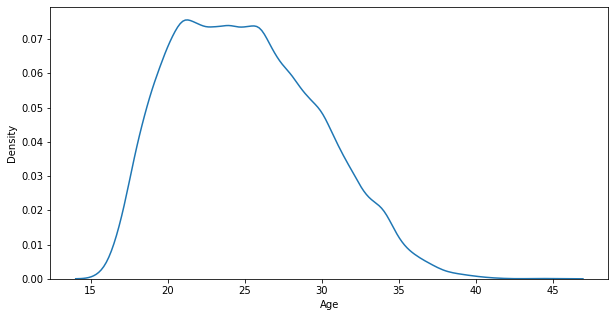

In [8]:
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.Age)
plt.show()

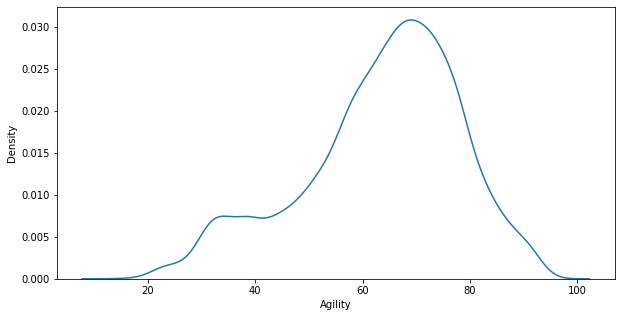

In [9]:
fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.Agility)
plt.show()

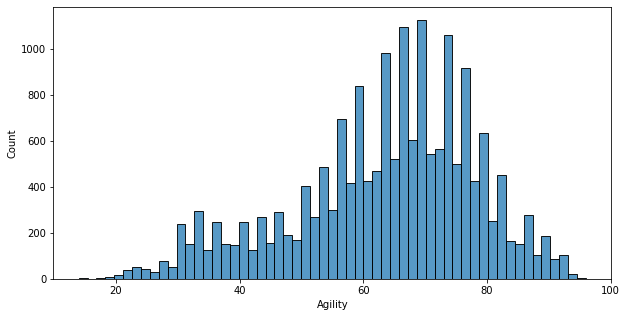

In [10]:
fig = plt.figure(figsize=(10,5))
sns.histplot(df.Agility)
plt.show()

In [19]:
(df
 .groupby('Nationality')
 .agg('count')['ID']
 .to_frame() 
 .sort_values(by='ID', ascending=False)
 .head(10)
 )

,ID
Nationality,
England,1662
Germany,1198
Spain,1072
Argentina,937
France,914
Brazil,827
Italy,702
Colombia,618
Japan,478


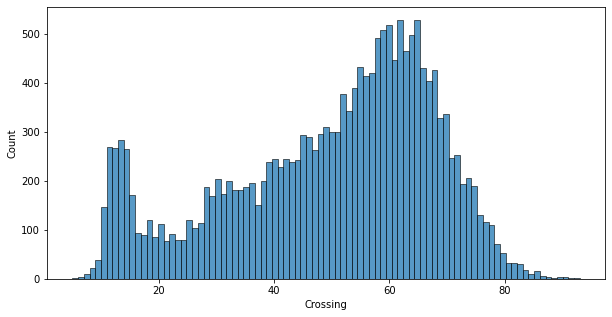

In [12]:
nbins = int(df.Crossing.max()-df.Crossing.min() + 1)

fig = plt.figure(figsize=(10,5))
sns.histplot(df.Crossing, bins=nbins)
plt.show()

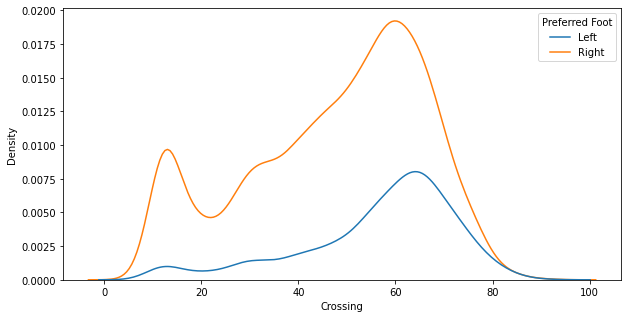

In [13]:
nbins = int(df.Crossing.max()-df.Crossing.min() + 1)

fig = plt.figure(figsize=(10,5))
sns.kdeplot(df.Crossing, hue = df['Preferred Foot'])
plt.show()

#### Mejores jugadores por posición

In [14]:
(df
 .iloc[df.groupby(df['Position'])['Overall']
       .idxmax()]
 [['Position','Name','Overall']]
 .sort_values(by = 'Overall', ascending=False)
 .head(10)
 )

,Position,Name,Overall
1,ST,Cristiano Ronaldo,94
0,RF,L. Messi,94
2,LW,Neymar Jr,92
5,LF,E. Hazard,91
7,RS,L. Suárez,91
4,RCM,K. De Bruyne,91
3,GK,De Gea,91
8,RCB,Sergio Ramos,91
12,CB,D. Godín,90
11,LCM,T. Kroos,90


# 2. Preparación de los datos a analizar

Reducimos el tamaño de la base. Retiramos jugadores con bajo Desempeño global ("Overall"),

y consideramos Variables de desempeño por habilidad (skills_ratings)

In [15]:
n=10000 #cantidad de jugadores a considerar
df_n=df.loc[:n] #se reduce la base a los n primeros jugadores
df_n.shape

(10001, 88)

In [16]:
df_n=df_n[(df_n['Overall']>70)]
df_n.shape

(4749, 88)

Se crea el jugador perfecto y el jugador promedio para ver a donde se ubican en nuestras visualizaciónes

In [17]:
skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

MachineGunDict = {'Name':'MachineGun',
                  'Overall':99}

for skill in skills_ratings:
    MachineGunDict[skill] = 99
MachineGunDict

{'Name': 'MachineGun',
 'Overall': 99,
 'Crossing': 99,
 'Finishing': 99,
 'HeadingAccuracy': 99,
 'ShortPassing': 99,
 'Volleys': 99,
 'Dribbling': 99,
 'Curve': 99,
 'FKAccuracy': 99,
 'LongPassing': 99,
 'BallControl': 99,
 'Acceleration': 99,
 'SprintSpeed': 99,
 'Agility': 99,
 'Reactions': 99,
 'Balance': 99,
 'ShotPower': 99,
 'Jumping': 99,
 'Stamina': 99,
 'Strength': 99,
 'LongShots': 99,
 'Aggression': 99,
 'Interceptions': 99,
 'Positioning': 99,
 'Vision': 99,
 'Penalties': 99,
 'Composure': 99,
 'Marking': 99,
 'StandingTackle': 99,
 'SlidingTackle': 99,
 'GKDiving': 99,
 'GKHandling': 99,
 'GKKicking': 99,
 'GKPositioning': 99,
 'GKReflexes': 99}

In [18]:
# agregamos al jugador perfecto a nuestros datos
df_n = df_n.append(MachineGunDict,ignore_index=True)
df_n.tail()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4745,209407.0,L. Lollo,27.0,https://cdn.sofifa.org/players/4/19/209407.png,Italy,https://cdn.sofifa.org/flags/27.png,71,71.0,Empoli,https://cdn.sofifa.org/teams/2/light/1746.png,€2.4M,€10K,1943.0,Right,1.0,3.0,3.0,High/ High,Normal,No,CM,17.0,"Jul 20, 2018",NaN,2021,5'11,165lbs,66+2,66+2,66+2,70+2,69+2,69+2,69+2,70+2,70+2,70+2,70+2,71+2,69+2,69+2,69+2,71+2,68+2,67+2,67+2,67+2,68+2,66+2,64+2,64+2,64+2,66+2,69.0,57.0,59.0,73.0,57.0,71.0,69.0,59.0,69.0,73.0,78.0,79.0,74.0,69.0,76.0,63.0,78.0,84.0,76.0,67.0,71.0,59.0,69.0,69.0,59.0,69.0,63.0,59.0,55.0,9.0,9.0,8.0,6.0,7.0,€4.4M
4746,212223.0,S. Maguire,24.0,https://cdn.sofifa.org/players/4/19/212223.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,71,78.0,Preston North End,https://cdn.sofifa.org/teams/2/light/1801.png,€3.4M,€10K,1748.0,Right,1.0,3.0,3.0,High/ Medium,Lean,No,ST,10.0,"Jul 24, 2017",NaN,2020,5'9,150lbs,70+2,70+2,70+2,70+2,70+2,70+2,70+2,70+2,67+2,67+2,67+2,68+2,58+2,58+2,58+2,68+2,53+2,48+2,48+2,48+2,53+2,51+2,47+2,47+2,47+2,51+2,48.0,73.0,67.0,58.0,56.0,73.0,36.0,33.0,40.0,71.0,93.0,92.0,88.0,64.0,85.0,63.0,70.0,76.0,65.0,53.0,52.0,28.0,74.0,62.0,66.0,67.0,50.0,28.0,22.0,15.0,10.0,13.0,12.0,12.0,€7.1M
4747,218623.0,Cafú,25.0,https://cdn.sofifa.org/players/4/19/218623.png,Portugal,https://cdn.sofifa.org/flags/38.png,71,73.0,Legia Warszawa,https://cdn.sofifa.org/teams/2/light/1871.png,€2.4M,€5K,1934.0,Right,1.0,3.0,3.0,Medium/ Medium,Stocky,No,RDM,26.0,NaN,FC Metz,"Jun 30, 2019",6'0,185lbs,69+2,69+2,69+2,65+2,67+2,67+2,67+2,65+2,66+2,66+2,66+2,66+2,69+2,69+2,69+2,66+2,67+2,70+2,70+2,70+2,67+2,67+2,69+2,69+2,69+2,67+2,50.0,57.0,71.0,72.0,70.0,70.0,54.0,46.0,69.0,71.0,65.0,64.0,58.0,66.0,66.0,84.0,61.0,87.0,83.0,73.0,83.0,69.0,68.0,58.0,69.0,64.0,58.0,69.0,67.0,11.0,9.0,13.0,12.0,11.0,NaN
4748,162047.0,Zapater,33.0,https://cdn.sofifa.org/players/4/19/162047.png,Spain,https://cdn.sofifa.org/flags/45.png,71,71.0,Real Zaragoza,https://cdn.sofifa.org/teams/2/light/244.png,€1.4M,€7K,1909.0,Right,1.0,3.0,3.0,Medium/ High,Stocky,No,RCM,21.0,"Jul 1, 2016",NaN,2023,5'11,176lbs,63+2,63+2,63+2,63+2,64+2,64+2,64+2,63+2,66+2,66+2,66+2,64+2,69+2,69+2,69+2,64+2,66+2,70+2,70+2,70+2,66+2,65+2,68+2,68+2,68+2,65+2,63.0,59.0,60.0,70.0,59.0,63.0,68.0,78.0,74.0,70.0,58.0,45.0,56.0,63.0,63.0,74.0,63.0,71.0,74.0,73.0,71.0,72.0,63.0,75.0,65.0,68.0,68.0,72.0,64.0,15.0,6.0,10.0,8.0,16.0,€2.2M
4749,NaN,MachineGun,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,NaN


In [24]:
jugadorPromedioDict = {'Name':'JugadorPromedio',
                       'Overall': df_n.Overall.mean()}

for skill in skills_ratings:
    jugadorPromedioDict[skill] = df_n[skill].mean() 


df_n=df_n.append(jugadorPromedioDict,ignore_index=True)
df_n.tail()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4746,212223.0,S. Maguire,24.0,https://cdn.sofifa.org/players/4/19/212223.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,71.000000,78.0,Preston North End,https://cdn.sofifa.org/teams/2/light/1801.png,€3.4M,€10K,1748.0,Right,1.0,3.0,3.0,High/ Medium,Lean,No,ST,10.0,"Jul 24, 2017",NaN,2020,5'9,150lbs,70+2,70+2,70+2,70+2,70+2,70+2,70+2,70+2,67+2,67+2,67+2,68+2,58+2,58+2,58+2,68+2,53+2,48+2,48+2,48+2,53+2,51+2,47+2,47+2,47+2,51+2,48.000000,73.000000,67.000000,58.000000,56.000000,73.000000,36.000000,33.000000,40.000000,71.000000,93.000000,92.000000,88.000000,64.000000,85.000000,63.000000,70.00,76.000000,65.000000,53.000000,52.000000,28.000000,74.000000,62.000000,66.000000,67.000000,50.000000,28.000000,22.000,15.000000,10.000000,13.000000,12.000000,12.000000,€7.1M
4747,218623.0,Cafú,25.0,https://cdn.sofifa.org/players/4/19/218623.png,Portugal,https://cdn.sofifa.org/flags/38.png,71.000000,73.0,Legia Warszawa,https://cdn.sofifa.org/teams/2/light/1871.png,€2.4M,€5K,1934.0,Right,1.0,3.0,3.0,Medium/ Medium,Stocky,No,RDM,26.0,NaN,FC Metz,"Jun 30, 2019",6'0,185lbs,69+2,69+2,69+2,65+2,67+2,67+2,67+2,65+2,66+2,66+2,66+2,66+2,69+2,69+2,69+2,66+2,67+2,70+2,70+2,70+2,67+2,67+2,69+2,69+2,69+2,67+2,50.000000,57.000000,71.000000,72.000000,70.000000,70.000000,54.000000,46.000000,69.000000,71.000000,65.000000,64.000000,58.000000,66.000000,66.000000,84.000000,61.00,87.000000,83.000000,73.000000,83.000000,69.000000,68.000000,58.000000,69.000000,64.000000,58.000000,69.000000,67.000,11.000000,9.000000,13.000000,12.000000,11.000000,NaN
4748,162047.0,Zapater,33.0,https://cdn.sofifa.org/players/4/19/162047.png,Spain,https://cdn.sofifa.org/flags/45.png,71.000000,71.0,Real Zaragoza,https://cdn.sofifa.org/teams/2/light/244.png,€1.4M,€7K,1909.0,Right,1.0,3.0,3.0,Medium/ High,Stocky,No,RCM,21.0,"Jul 1, 2016",NaN,2023,5'11,176lbs,63+2,63+2,63+2,63+2,64+2,64+2,64+2,63+2,66+2,66+2,66+2,64+2,69+2,69+2,69+2,64+2,66+2,70+2,70+2,70+2,66+2,65+2,68+2,68+2,68+2,65+2,63.000000,59.000000,60.000000,70.000000,59.000000,63.000000,68.000000,78.000000,74.000000,70.000000,58.000000,45.000000,56.000000,63.000000,63.000000,74.000000,63.00,71.000000,74.000000,73.000000,71.000000,72.000000,63.000000,75.000000,65.000000,68.000000,68.000000,72.000000,64.000,15.000000,6.000000,10.000000,8.000000,16.000000,€2.2M
4749,NaN,MachineGun,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000,99.000000,99.000000,99.000000,99.000000,99.000000,NaN
4750,NaN,JugadorPromedio,NaN,NaN,NaN,NaN,74.847158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.264211,53.585263,59.231158,67.637263,51.685053,63.947789,56.926737,51.556421,61.862105,67.495368,67.601263,67.763579,67.730526,71.628421,65.666947,64.870105,68.52,69.269

In [ ]:
JugadorPromedioDict={'Name':'JugadorPromedio','Overall':df_n.Overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()
    
df_n=df_n.append(JugadorPromedioDict,ignore_index=True)

In [25]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)
df_skills.sample(5)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
2703,66.0,65.0,55.0,72.0,60.0,78.0,63.0,65.0,55.0,77.0,87.0,85.0,88.0,73.0,89.0,60.0,71.0,66.0,34.0,68.0,40.0,25.0,72.0,72.0,69.0,72.0,55.0,27.0,12.0,6.0,7.0,6.0,5.0,14.0
3617,72.0,72.0,64.0,70.0,68.0,75.0,73.0,56.0,63.0,72.0,75.0,72.0,74.0,71.0,72.0,85.0,54.0,55.0,76.0,75.0,48.0,41.0,73.0,67.0,74.0,77.0,39.0,45.0,35.0,10.0,13.0,13.0,15.0,7.0
4668,49.0,65.0,58.0,71.0,22.0,60.0,49.0,58.0,72.0,71.0,78.0,78.0,78.0,66.0,76.0,65.0,57.0,81.0,68.0,52.0,75.0,69.0,57.0,63.0,64.0,65.0,70.0,68.0,67.0,13.0,7.0,5.0,8.0,15.0
2781,68.0,55.0,57.0,75.0,59.0,67.0,71.0,78.0,72.0,73.0,63.0,66.0,60.0,68.0,81.0,76.0,45.0,86.0,61.0,75.0,67.0,67.0,61.0,77.0,75.0,71.0,54.0,69.0,59.0,9.0,7.0,11.0,13.0,13.0
3598,64.0,58.0,38.0,68.0,51.0,82.0,67.0,57.0,60.0,78.0,79.0,84.0,75.0,65.0,75.0,67.0,55.0,63.0,66.0,54.0,58.0,34.0,68.0,62.0,63.0,66.0,36.0,48.0,36.0,16.0,14.0,11.0,16.0,12.0


# 3. Exploratorio Visual para Clustering

Visualizamos los datos (jugadores) según sus habilidades es decir, en un espacio 34 dimensional. Cómo hacemos? empecemos de a dos variables numéricas por vez

Consigna de trabajo: visualizar a los jugadores (datos) usando las variables numéricas en skill_ratings de a pares. Emergen grupos/clusters?

In [29]:
# definimos un booleano para clasificar a los jugadores en cracks y no_cracks
bool_crack = df_n.Overall > 85
bool_crack

0        True
1        True
2        True
3        True
4        True
        ...  
4746    False
4747    False
4748    False
4749     True
4750    False
Name: Overall, Length: 4751, dtype: bool

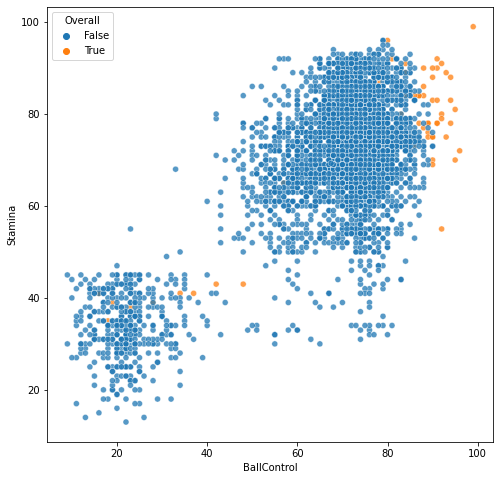

In [58]:
# Vamos a analizar de a 2 variables

skill_1=skills_ratings[9] 
skill_2=skills_ratings[17]   

fig = plt.figure(figsize=(8,8),
                #  dpi=80
                 )

sns.scatterplot(x = df_skills[skill_1],
                y = df_skills[skill_2],
                # size=3,
                hue=bool_crack,
                alpha=0.75,
                # legend=['Regular','Cracks']
                )

plt.xlabel(skill_1)
plt.ylabel(skill_2)
# plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

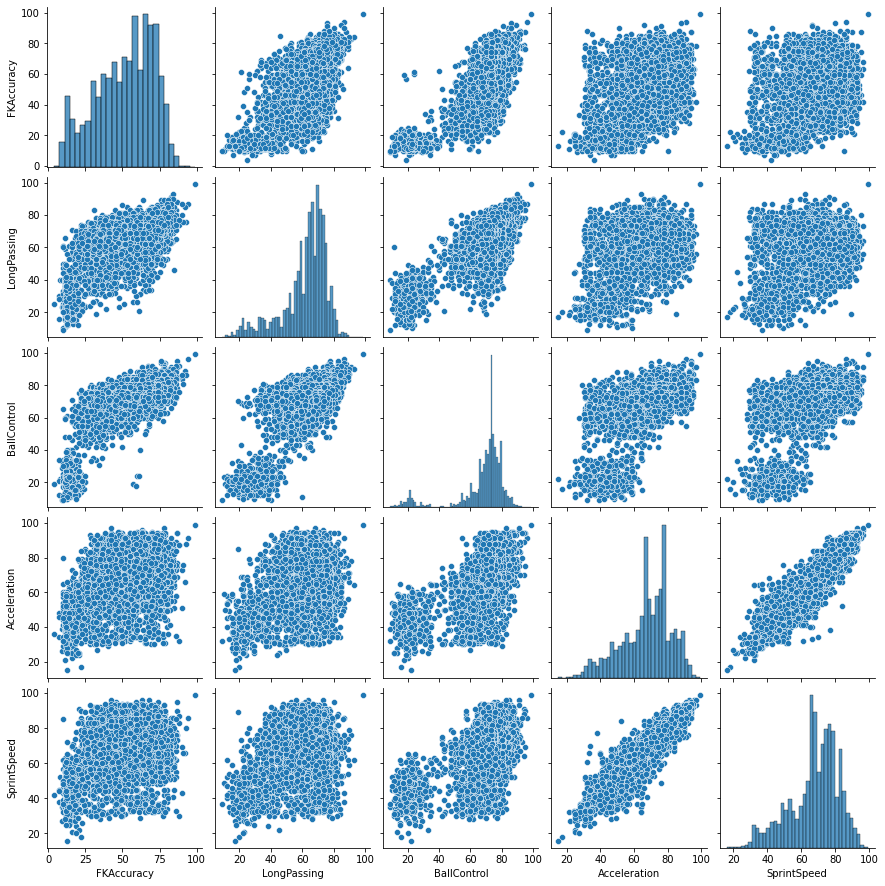

In [62]:
# Si queremos inspeccionar relaciones entre más de dos features podemos usar la clase pairplot de Seaborn
fig = plt.figure()
sns.pairplot(df_skills[skills_ratings[7:12]])
plt.show()